# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Loading data

In [2]:
df = pd.read_csv('US_violent_crime.csv') 
df.set_index('Unnamed: 0',inplace = True)

In [3]:
df.head(5)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# Scaling (Zero mean is fundamentally necessary step, scaling is also important)

In [4]:
scaler = StandardScaler()
df_ = pd.DataFrame(scaler.fit_transform(df), columns=[ 'Murder', 'Assault', 'UrbanPop', 'Rape'])

# Defining and applying sklearn PCA

In [5]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_[[ 'Murder', 'Assault', 'UrbanPop', 'Rape']])

$U = A V A^{T}$

* For particular, choice of $A$,  $U$ can be diagonal. 
* Once we diagonalize, $A$ can be written with the help of normalized eigenvectors    

  
$A$= \begin{pmatrix}
\cdots &\alpha^{1} & \cdots \\
\cdots &\alpha^{2} & \cdots \\
\cdots &\alpha^{3} & \cdots \\
\cdots & \vdots & \cdots \\
\end{pmatrix}

 
$y_{k}(\vec{x}) - y_{k}(\vec{\mu})\approx   \sum_{i=1}^{n}\left[\frac{\partial y_{k}}{\partial x_{i}} \right]_{\vec{x}=\vec{\mu}}(x_i -\mu_i)$

*  So $   y_{k}(\vec{x}) - y_{k}(\vec{\mu})\approx A_{ki}(x_i -\mu_i)$ or 

 \begin{pmatrix}
y_1 -\bar{y}_1 \\
y_2 -\bar{y}_2 \\
y_3 -\bar{y}_3 \\
\vdots\\
y_n -\bar{y}_n \\
\end{pmatrix} 

= A 
 \begin{pmatrix}
x_1 -\bar{x}_1 \\
x_2 -\bar{x}_2 \\
x_3 -\bar{x}_3 \\
\vdots\\
x_n -\bar{x}_n \\
\end{pmatrix} 


 

* So we get $n$ a new set of variables amongst which the correlation is zero. 
* $y_{k}$ is related to $\alpha^{k}$ (Sort w.r.t eigenvalue magnitude) eigenvector


In [6]:
# eigenvectors actually corresponds to the transformer matrix A
eigenvectors =pca.components_

# square of eigenvalue related to variances
array = np.matmul(eigenvectors,df_.to_numpy().T).T

#  eigenvalue related to variances
eigenval = pca.explained_variance_

# features axis in features spaces
feature_space_features = np.diag(np.full(4,1))

# features axis in PCA spaces
PCAspace_features = np.matmul(eigenvectors,feature_space_features).T


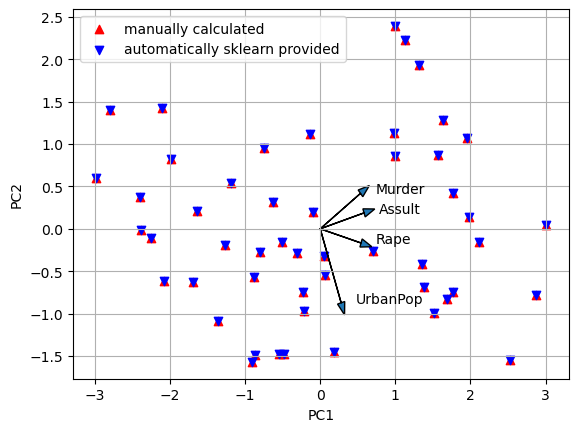

In [7]:
# pricipal components calculated manually
plt.scatter(array[:,0], array[:,1], color='red', marker='^', label='manually calculated') 

# pricipal components provided by sklearn
plt.scatter(principalComponents[:,0], principalComponents[:,1], color='blue',marker='v', label='automatically sklearn provided')

plt.arrow(0,0,PCAspace_features[0,0], PCAspace_features[0,1], head_width=0.1)
plt.arrow(0,0,PCAspace_features[1,0], PCAspace_features[1,1], head_width=0.1 )
plt.arrow(0,0,PCAspace_features[2,0], PCAspace_features[2,1], head_width=0.1 )
plt.arrow(0,0,PCAspace_features[3,0], PCAspace_features[3,1], head_width=0.1 )

plt.text( PCAspace_features[0,0]+0.2, PCAspace_features[0,1], 'Murder',)
plt.text( PCAspace_features[1,0]+0.2, PCAspace_features[1,1], 'Assult',)
plt.text( PCAspace_features[2,0]+0.2, PCAspace_features[2,1], 'UrbanPop',)
plt.text( PCAspace_features[3,0]+0.2, PCAspace_features[3,1], 'Rape',)

plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Find eigenvalue solution manually

In [8]:
V = df_.corr()
w, v = np.linalg.eig(V.to_numpy())

In [12]:
v.T

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791]])

In [16]:
eigenvectors

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791]])

In [11]:
w

array([2.48024158, 0.98976515, 0.17343009, 0.35656318])

In [15]:
eigenval

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

# Automatically pca and plotting

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


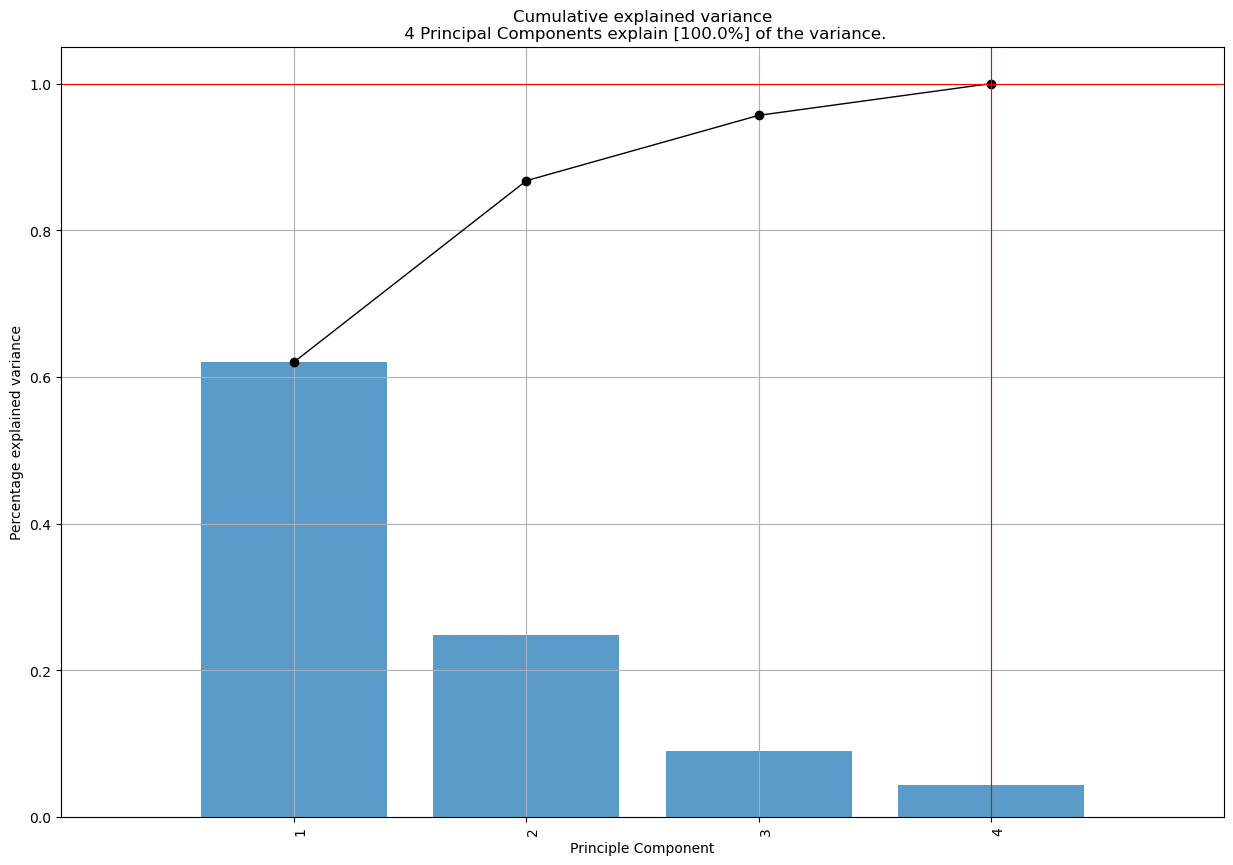

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 640x480 with 0 Axes>

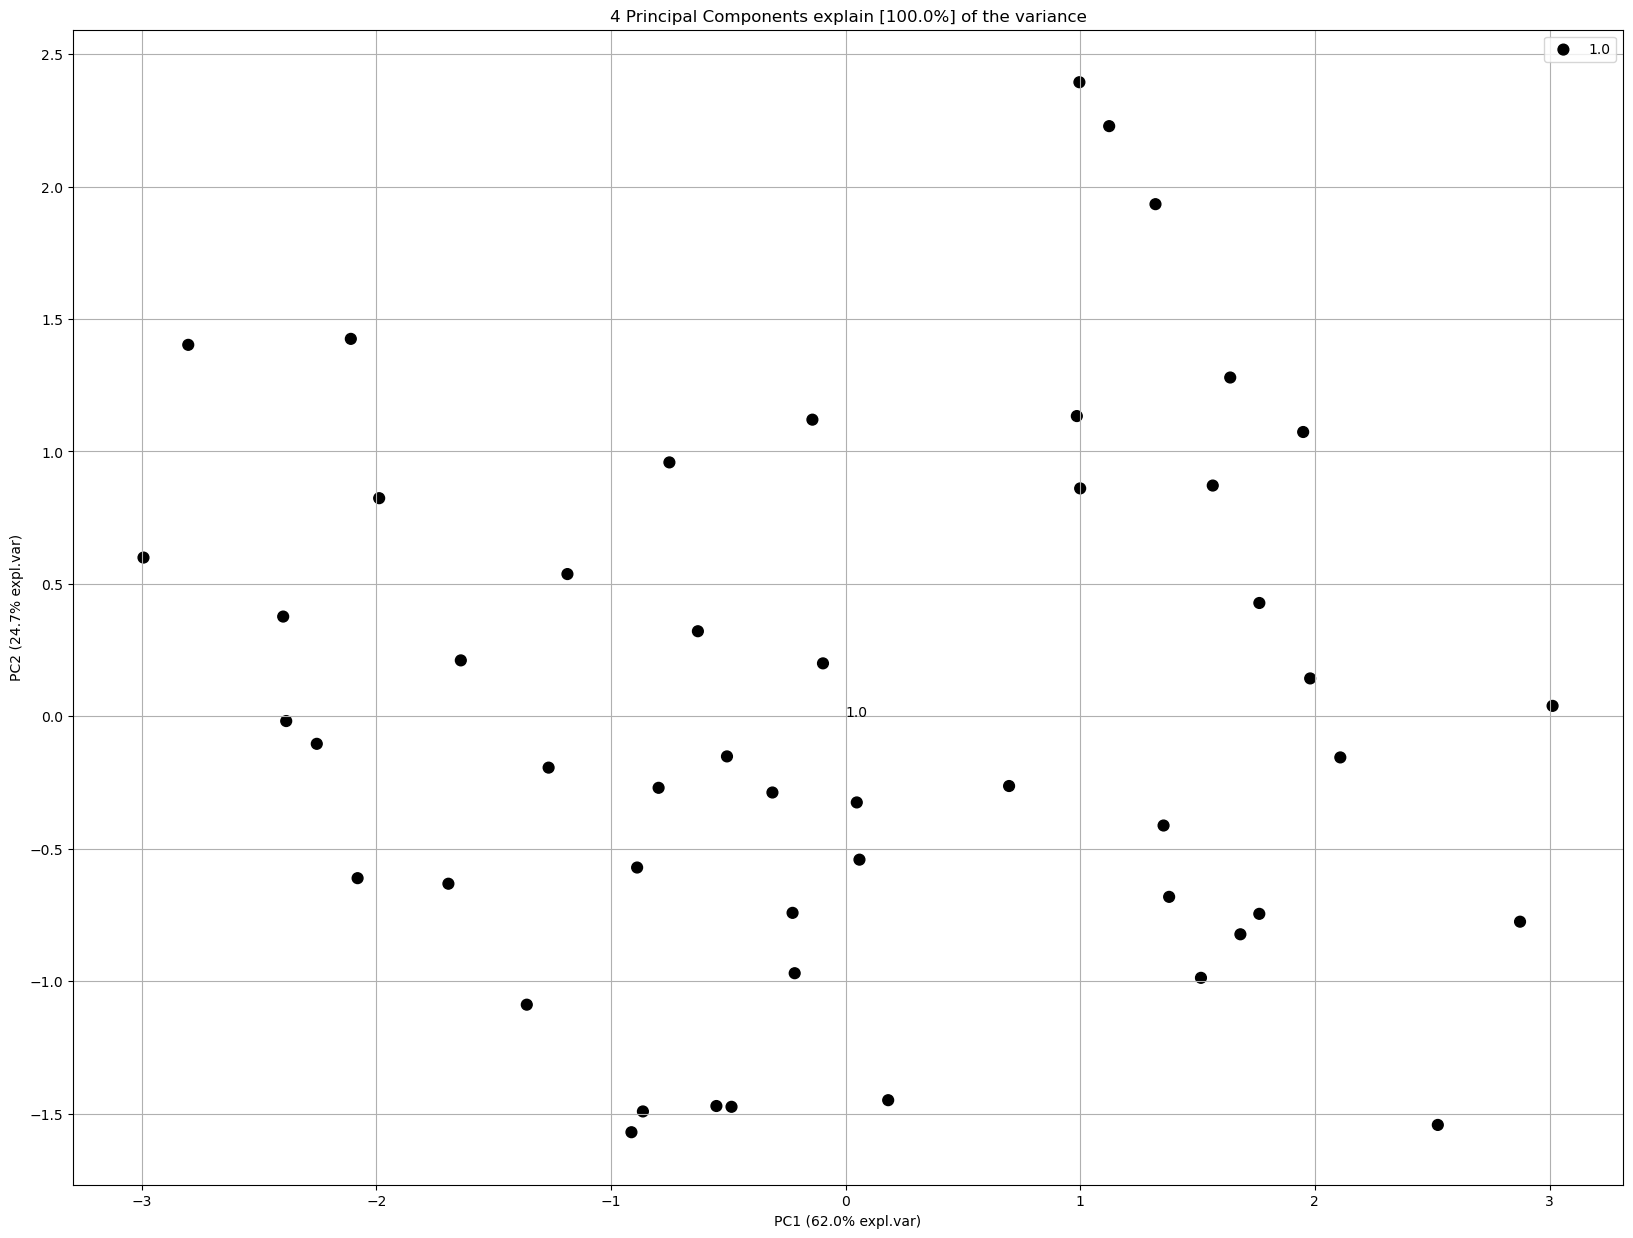

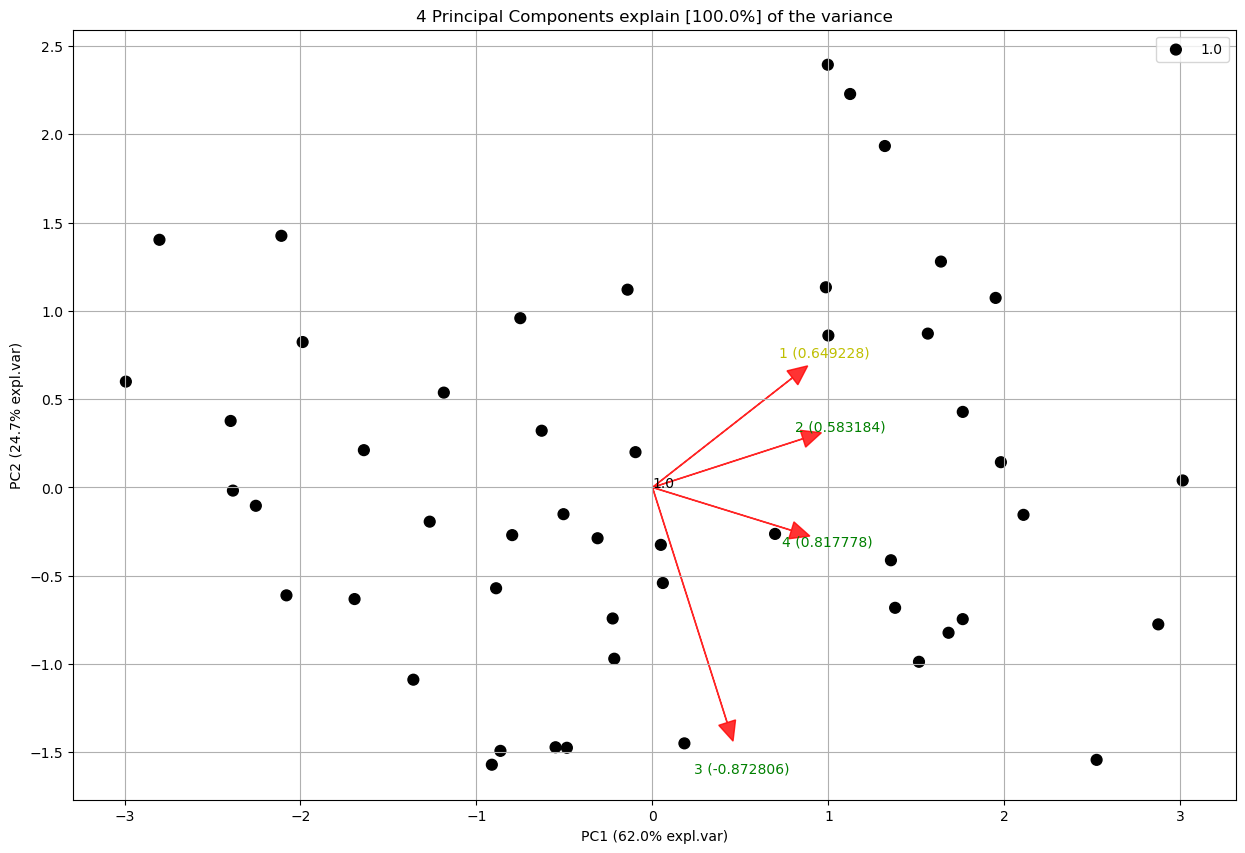

In [10]:

scaler = StandardScaler()

from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=1)

# Or reduce the data towards 2 PCs
model = pca(n_components=4)

# Fit transform
results = model.fit_transform(scaler.fit_transform(df))

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)